# Global Power Plant Database
### Problem Statement:

Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Key attributes of the database

The database includes the following indicators:

    `country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
    `country_long` (text): longer form of the country designation
    `name` (text): name or title of the power plant, generally in Romanized form
    `gppd_idnr` (text): 10 or 12 character identifier for the power plant
    `capacity_mw` (number): electrical generating capacity in megawatts
    `latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
    `longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
    `primary_fuel` (text): energy source used in primary electricity generation or export
    `other_fuel1` (text): energy source used in electricity generation or export
    `other_fuel2` (text): energy source used in electricity generation or export
    `other_fuel3` (text): energy source used in electricity generation or export
     `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
    `owner` (text): majority shareholder of the power plant, generally in Romanized form
    `source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
    `url` (text): web document corresponding to the `source` field
    `geolocation_source` (text): attribution for geolocation information
    `wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
    `year_of_capacity_data` (number): year the capacity information was reported
    `generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
    `generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
    `generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
    `generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
    `generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
    `generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
    `generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
    `generation_data_source` (text): attribution for the reported generation information
    `estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
    `estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
    `estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
    `estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
    `estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
    'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
    `estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
    `estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
    `estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
    `estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

Fuel Type Aggregation

We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

In [1]:
# 1. Import the libraries
# basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# statistical libraries
import phik
from scipy.stats import pearsonr
from scipy.stats import zscore

# feature engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# metrics 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, classification_report

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [91]:
df = pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')

In [92]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [93]:
from pandas.api.types import is_numeric_dtype

In [94]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [95]:
# Checking for null values
df.isnull().sum()/len(df)*100

country                       0.000000
country_long                  0.000000
name                          0.000000
gppd_idnr                     0.000000
capacity_mw                   0.000000
latitude                      5.071665
longitude                     5.071665
primary_fuel                  0.000000
other_fuel1                  78.169791
other_fuel2                  99.889746
other_fuel3                 100.000000
commissioning_year           41.896362
owner                        62.293275
source                        0.000000
url                           0.000000
geolocation_source            2.094818
wepp_id                     100.000000
year_of_capacity_data        42.778390
generation_gwh_2013         100.000000
generation_gwh_2014          56.119074
generation_gwh_2015          53.472988
generation_gwh_2016          52.149945
generation_gwh_2017          51.488423
generation_gwh_2018          50.606395
generation_gwh_2019         100.000000
generation_data_source   

In [96]:
# There a quite a few columns with null values. Remove those columns that have a null value % greater than 40
null_col = []
for col in df.columns:
    if df[col].isnull().sum()/len(df) > 0.40:
        null_col.append(col)

In [97]:
df.drop(columns = null_col, inplace  = True)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             907 non-null    object 
 1   country_long        907 non-null    object 
 2   name                907 non-null    object 
 3   gppd_idnr           907 non-null    object 
 4   capacity_mw         907 non-null    float64
 5   latitude            861 non-null    float64
 6   longitude           861 non-null    float64
 7   primary_fuel        907 non-null    object 
 8   source              907 non-null    object 
 9   url                 907 non-null    object 
 10  geolocation_source  888 non-null    object 
dtypes: float64(3), object(8)
memory usage: 78.1+ KB


In [99]:
# Check the statistics
df.describe().round()

,capacity_mw,latitude,longitude
count,907.0,861.0,861.0
mean,326.0,21.0,77.0
std,590.0,6.0,5.0
min,0.0,8.0,69.0
25%,17.0,17.0,74.0
50%,59.0,22.0,77.0
75%,385.0,26.0,79.0
max,4760.0,35.0,95.0


The capacity_mw has a very high standard deviation

In [100]:
# Checking for columns/ features with unique values
unique_col = []
for col in df.columns:
    if df[col].unique().shape[0] <2:
        unique_col.append(col)

In [101]:
unique_col

['country', 'country_long']

In [102]:
df[unique_col]

,country,country_long
0,IND,India
1,IND,India
2,IND,India
3,IND,India
4,IND,India
...,...,...
902,IND,India
903,IND,India
904,IND,India
905,IND,India


Apparently the two features have unique values and don't contribute to the dataset for generalization. hence we drop these features

In [103]:
df.drop(columns = unique_col, inplace = True)

In [104]:
# Checking for features with a high variance
for col in df.columns:
    print(f"{col:20s} : {df[col].unique().shape[0]/len(df)*100 : 0.3f}")

name                 :  100.000
gppd_idnr            :  100.000
capacity_mw          :  39.802
latitude             :  92.282
longitude            :  91.290
primary_fuel         :  0.882
source               :  21.058
url                  :  33.517
geolocation_source   :  0.441


In [105]:
# remove columns with a variance > 90
var_col = []
for col in df.columns:
    if df[col].unique().shape[0]/len(df) > .90:
        var_col.append(col)

In [106]:
df.drop(columns = var_col, inplace = True)

In [107]:
df

,capacity_mw,primary_fuel,source,url,geolocation_source
0,2.5,Solar,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory
1,98.0,Coal,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI
2,39.2,Wind,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI
3,135.0,Gas,Central Electricity Authority,http://www.cea.nic.in/,WRI
4,1800.0,Coal,Central Electricity Authority,http://www.cea.nic.in/,WRI
...,...,...,...,...,...
902,1600.0,Coal,Central Electricity Authority,http://www.cea.nic.in/,WRI
903,3.0,Solar,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About
904,25.5,Wind,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI
905,80.0,Coal,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI


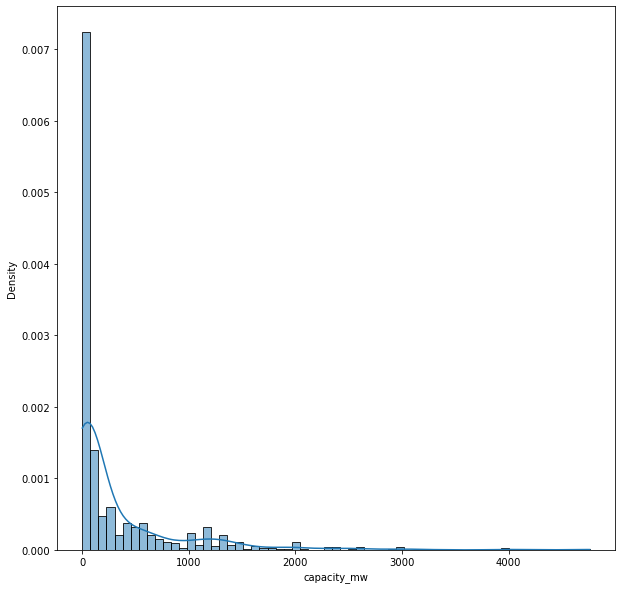

In [108]:
# Checking the histogram for the capacity_mw
plt.figure(figsize = (10, 10))
sns.histplot(df['capacity_mw'], kde = True, stat= 'density')
plt.show()

In [109]:
df['capacity_mw'].skew()

3.123576153626497

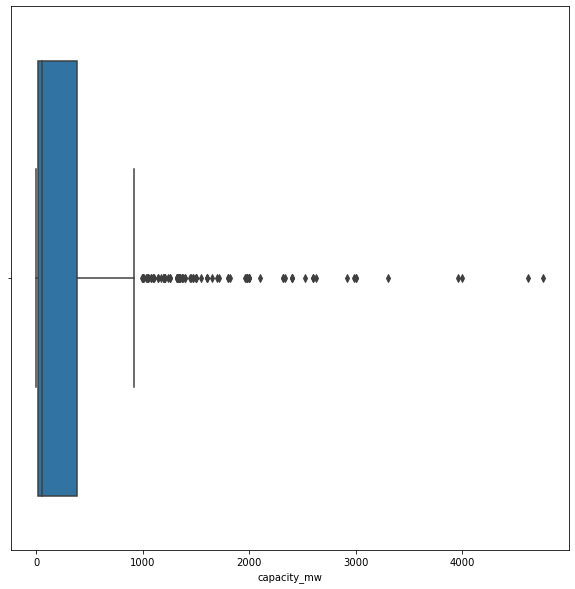

In [110]:
# Apparently there is a large skewness within the dataset. We also check for outliers?
plt.figure(figsize = (10,10))
sns.boxplot(df['capacity_mw'], orient = 'h')
plt.show()

In [111]:
# Apparently there are quite a few outliers

In [112]:
from scipy.stats import zscore

In [113]:
print(f"{df[(abs(zscore(df[['capacity_mw']]))>3.0).all(axis = 1)].shape[0]/len(df)*100:0.2f}%")

2.21%


In [114]:
# Since 2% of the data is lost we can afford to remove these outliers

In [115]:
df1 = df[(abs(zscore(df[['capacity_mw']]))<3.0).all(axis = 1)]

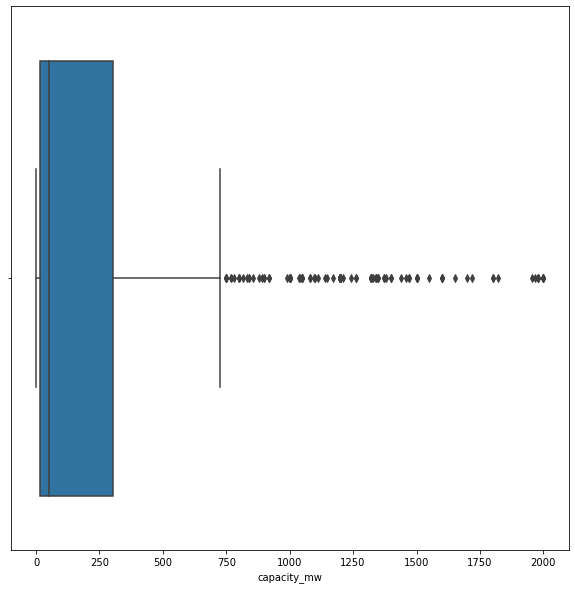

In [116]:
plt.figure(figsize = (10,10))
sns.boxplot(df1['capacity_mw'], orient = 'h')
plt.show()

In [117]:
# Quite a few outliers are still present hence we attempt removing the outliers using the 
# interquantile range
q1 = df['capacity_mw'].quantile(0.25)
q3 = df['capacity_mw'].quantile(0.75)
iq = q3 - q1

hi = q3 + 1.5 * iq

print(f"Data lost : {np.where(df['capacity_mw'] > hi)[0].shape[0]/len(df)*100:0.3f}%")

Data lost : 12.459%


In [118]:
# 12.5% of the data would be lost with the removal of the outliers
indices = np.where(df['capacity_mw'] > hi)[0]

In [119]:
df2 = df.drop(index = indices)

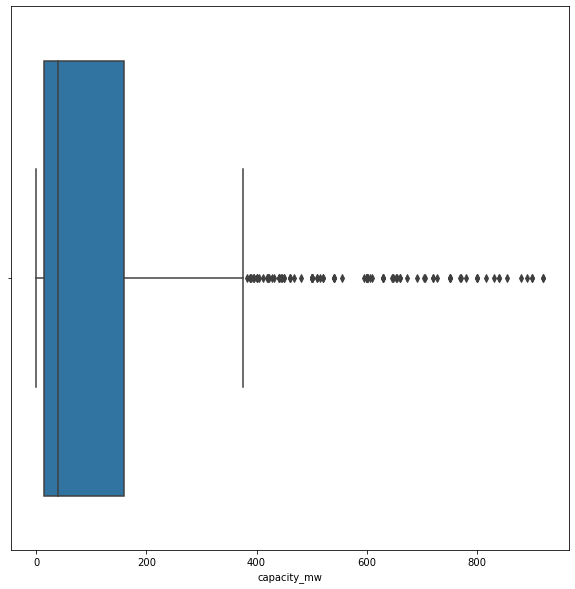

In [120]:
plt.figure(figsize = (10, 10))
sns.boxplot(df2['capacity_mw'], orient = 'h')
plt.show()

In [129]:
df = df2.reset_index()

In [131]:
df.drop('index', axis = 1, inplace = True)

In [122]:
# Checking for missing values
df.isnull().sum()

capacity_mw            0
primary_fuel           0
source                 0
url                    0
geolocation_source    19
dtype: int64

In [132]:
indices = np.where(df.isnull())[0]

In [133]:
# removing the null indices 
indices

array([ 20,  59, 173, 189, 230, 345, 395, 447, 485, 578, 596, 676, 679,
       680, 681, 682, 725, 773, 775], dtype=int64)

In [136]:
df.drop(index = indices, inplace = True)

In [141]:
# next we encode the categorical features
from pandas.api.types import is_numeric_dtype

In [144]:
categorical_col = []
for col in df.columns:
    if not is_numeric_dtype(df[col]):
        categorical_col.append(col)

In [145]:
categorical_col

['primary_fuel', 'source', 'url', 'geolocation_source']

In [147]:
for col in categorical_col:
    print(df[col].unique().shape[0])

8
190
287
3


In [152]:
df.head(1)

,capacity_mw,primary_fuel,source,url,geolocation_source
0,2.5,Solar,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory


In [151]:
from sklearn.preprocessing import LabelEncoder

In [153]:
df['primary_fuel'] = LabelEncoder().fit_transform(df['primary_fuel'])

In [154]:
df['source'] = LabelEncoder().fit_transform(df['source'])
df['url'] = LabelEncoder().fit_transform(df['url'])
df['geolocation_source'] = LabelEncoder().fit_transform(df['geolocation_source'])

In [155]:
# scaling and normalizing the 'capacity_mw' feature
from sklearn.preprocessing import PowerTransformer

In [156]:
df['capacity_mw'] = PowerTransformer().fit_transform(df[['capacity_mw']])

In [158]:
y = df['primary_fuel']
x = df.drop('primary_fuel', axis = 1)

In [160]:
from sklearn.model_selection import train_test_split

In [161]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [169]:
from sklearn.metrics import plot_roc_curve, accuracy_score

In [170]:
# Building our Logistic regressor models
dt = DecisionTreeClassifier()
lr = LogisticRegression()
kn = KNeighborsClassifier()
rf = RandomForestClassifier()

estimators = []
estimators.append((dt, 'DecisionTreeClassifier'))
estimators.append((lr, 'LogisticRegression'))
estimators.append((kn, 'KNeighborsClassifier'))
estimators.append((rf, 'RandomForestClassifier'))

for estimator in estimators:
    estimator[0].fit(xtrain, ytrain)
    ypred = estimator[0].predict(xtest)
    print()
    print(f"{estimator[1]} : {accuracy_score(ytest, ypred)*100:0.3f}%")


DecisionTreeClassifier : 80.000%

LogisticRegression : 73.548%

KNeighborsClassifier : 67.097%

RandomForestClassifier : 82.581%


In [174]:
param_grid = {'n_estimators':[100, 150, 200, 300],
              'criterion' :['gini','entropy'],
              'max_depth' :[2, 3, 4, 5, 6, 7],
              'min_samples_split': [2, 4, 5, 6, 8]}

gs1 = GridSearchCV(RandomForestClassifier(), param_grid = param_grid, n_jobs = -1)
gs1.fit(xtrain, ytrain)
rf_best_est = gs1.best_estimator_

The accuracy has impressively improved from 77% to 88.9%, hence we will save this model 

In [175]:
import joblib

In [177]:
joblib.dump(rf_best_est, 'powerPlant.pkl')

['powerPlant.pkl']